# Loan Prediction 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df=pd.read_csv(r'C:\Users\RAHUL KUMAR DUTTA\Downloads\train_u6lujuX_CVtuZ9i.csv')

In [3]:
test_df=pd.read_csv(r'C:\Users\RAHUL KUMAR DUTTA\Downloads\test_Y3wMUE5_7gLdaTN.csv')

In [4]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
loan_df=train_df.append(test_df)

In [7]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
print(train_df.shape)
print(test_df.shape)
print(loan_df.shape)

(614, 13)
(367, 12)
(981, 13)


In [9]:
loan_df['Loan_Status'].unique()

array(['Y', 'N', nan], dtype=object)

In [10]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [11]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [12]:
loan_df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

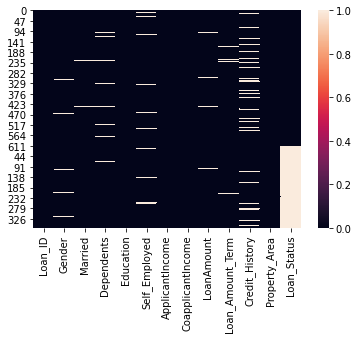

In [13]:
sns.heatmap(loan_df.isnull())

In [14]:
loan_df.drop('Loan_ID',inplace=True,axis=1)

### Filling the values in missing places

In [15]:
loan_df['Gender'].fillna(loan_df['Gender'].mode()[0],inplace=True)

In [16]:
loan_df['Married'].fillna(loan_df['Married'].mode()[0],inplace=True)

In [17]:
loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0],inplace=True)

In [18]:
loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0],inplace=True)

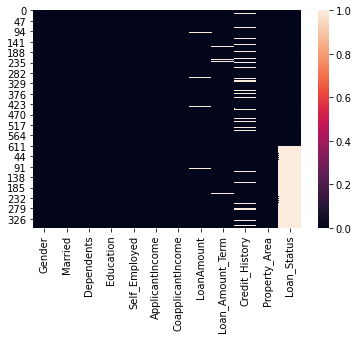

In [19]:
sns.heatmap(loan_df.isnull())

In [20]:
loan_df['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [21]:
loan_df['Loan_Amount_Term'].fillna('360.0',inplace=True)

In [22]:
loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].mean(),inplace=True)

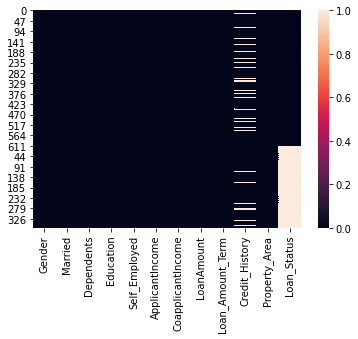

In [23]:
sns.heatmap(loan_df.isnull())

In [24]:
loan_df['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [25]:
loan_df['Credit_History'].fillna("1.0",inplace=True)

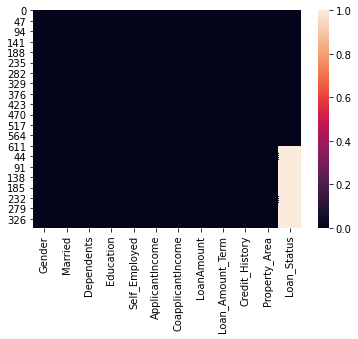

In [26]:
sns.heatmap(loan_df.isnull())

In [27]:
loan_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [28]:
loan_df['Loan_Status'].fillna(loan_df['Loan_Status'].mode()[0],inplace=True)

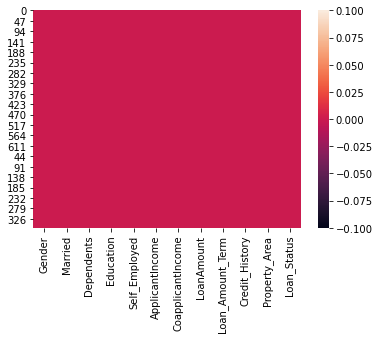

In [29]:
sns.heatmap(loan_df.isnull())

In [30]:
loan_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [31]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,142.51153,360,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.00000,360,1,Urban,Y


In [32]:
from sklearn import preprocessing

In [33]:
label_encoder=preprocessing.LabelEncoder()

In [34]:
loan_df['Gender']=label_encoder.fit_transform(loan_df['Gender'])

In [35]:
loan_df['Married']=label_encoder.fit_transform(loan_df['Married'])

In [36]:
loan_df['Dependents'].value_counts()

0     570
2     160
1     160
3+     91
Name: Dependents, dtype: int64

In [37]:
loan_df['Self_Employed']=label_encoder.fit_transform(loan_df['Self_Employed'])

In [38]:
loan_df['Property_Area']=label_encoder.fit_transform(loan_df['Property_Area'])

In [39]:
loan_df['Education']=label_encoder.fit_transform(loan_df['Education'])

In [40]:
loan_df['Dependents']=loan_df['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

In [41]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,142.51153,360,1,2,Y
1,1,1,1,0,0,4583,1508.0,128.00000,360,1,0,N
2,1,1,0,0,1,3000,0.0,66.00000,360,1,2,Y
3,1,1,0,1,0,2583,2358.0,120.00000,360,1,2,Y
4,1,0,0,0,0,6000,0.0,141.00000,360,1,2,Y


### Changing the data type of Credit History

In [42]:
loan_df['Credit_History']=pd.to_numeric(loan_df['Credit_History']).astype(int)

In [43]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    int32  
 1   Married            981 non-null    int32  
 2   Dependents         981 non-null    int64  
 3   Education          981 non-null    int32  
 4   Self_Employed      981 non-null    int32  
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    object 
 9   Credit_History     981 non-null    int32  
 10  Property_Area      981 non-null    int32  
 11  Loan_Status        981 non-null    object 
dtypes: float64(2), int32(6), int64(2), object(2)
memory usage: 76.6+ KB


# Visualization

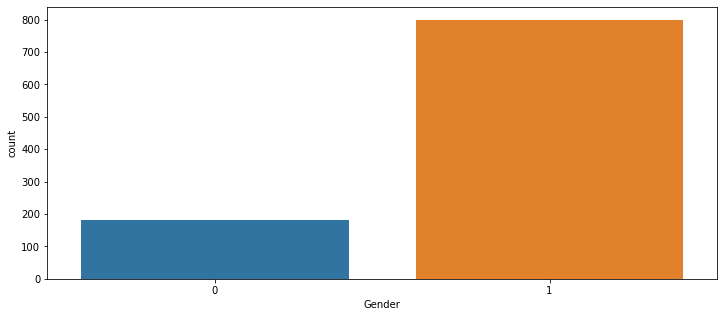

In [44]:
plt.figure(figsize=(12,5))

sns.countplot('Gender',data=loan_df)

In [45]:
loan_df['Gender'].value_counts()

1    799
0    182
Name: Gender, dtype: int64

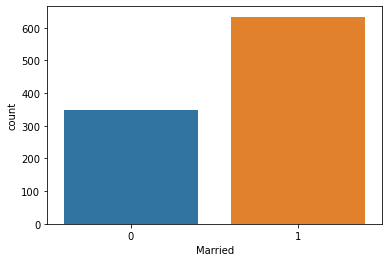

In [46]:
sns.countplot('Married',data=loan_df)

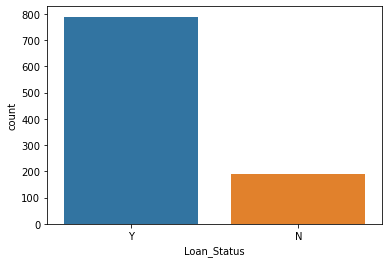

In [47]:
sns.countplot('Loan_Status',data=loan_df)

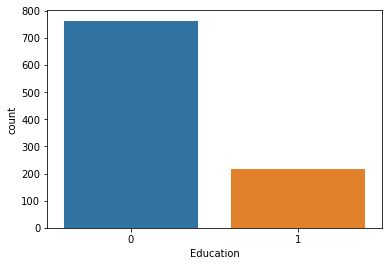

In [48]:
sns.countplot('Education',data=loan_df)

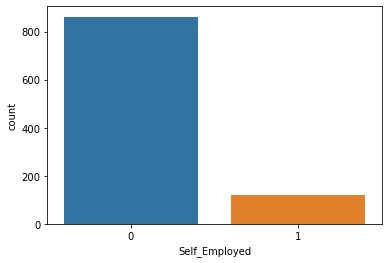

In [49]:
sns.countplot('Self_Employed',data=loan_df)

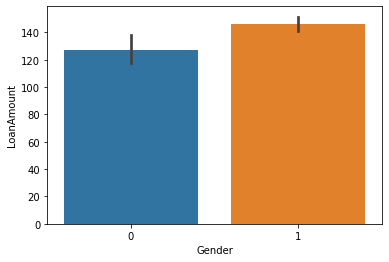

In [50]:
sns.barplot(x='Gender',y='LoanAmount',data=loan_df)

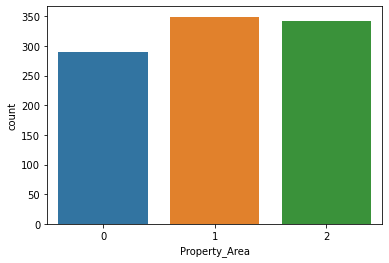

In [51]:
sns.countplot(x='Property_Area',data=loan_df)

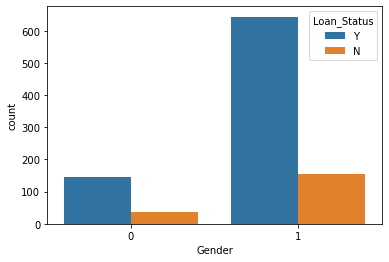

In [52]:
sns.countplot('Gender',hue='Loan_Status',data=loan_df)

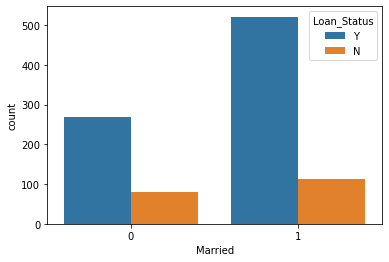

In [53]:
sns.countplot('Married',hue='Loan_Status',data=loan_df)

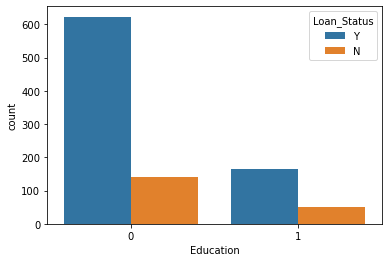

In [54]:
sns.countplot('Education',hue='Loan_Status',data=loan_df)

## Pair Plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Defa

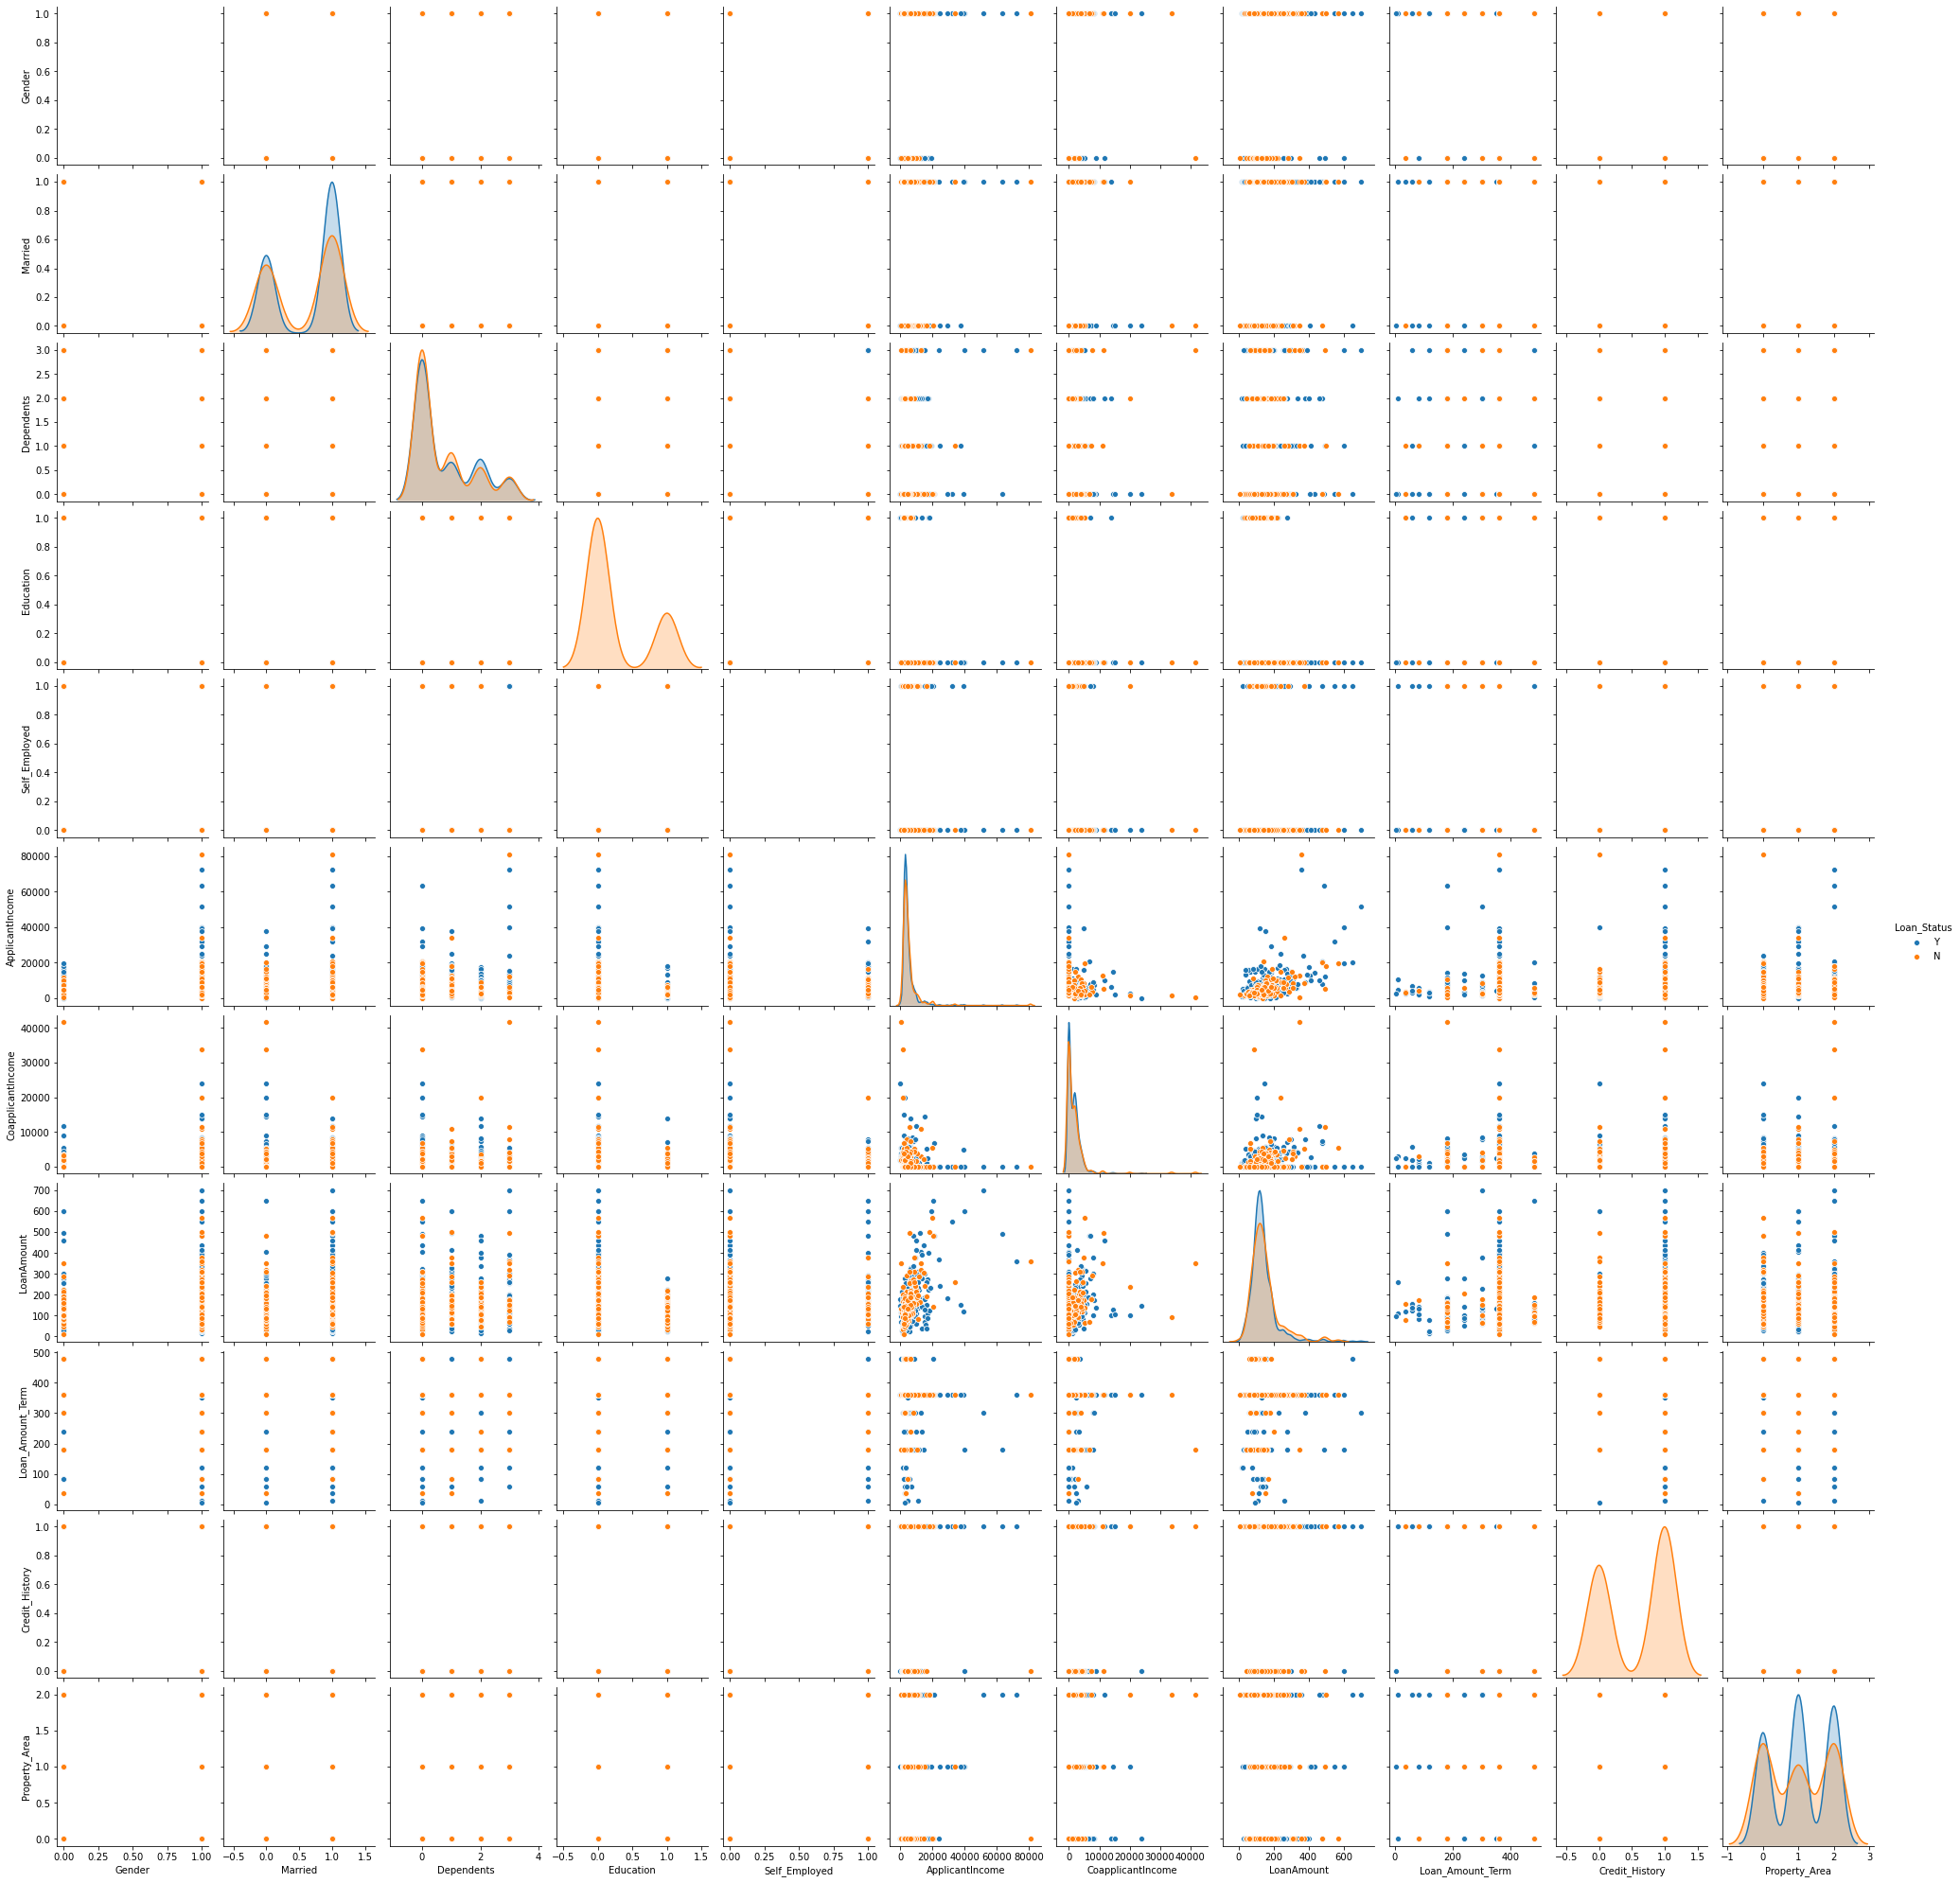

In [55]:
sns.pairplot(loan_df,hue='Loan_Status')

In [56]:
loan_df['Loan_Status']=loan_df['Loan_Status'].map({'Y':0,'N':1})

## Correlation Matrix

In [57]:
loan_df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.327012,0.139248,0.040649,0.024719,0.060444,0.082428,0.096499,0.018627,-0.020801,-0.009116
Married,0.327012,1.000000,0.344291,0.026211,0.013666,0.052126,0.061606,0.156737,0.021738,0.006372,-0.059570
Dependents,0.139248,0.344291,1.000000,0.084894,0.026241,0.122136,0.003223,0.149233,-0.045335,0.018639,-0.018397
Education,0.040649,0.026211,0.084894,1.000000,-0.010848,-0.138909,-0.060380,-0.162215,-0.062416,-0.050685,0.057680
Self_Employed,0.024719,0.013666,0.026241,-0.010848,1.000000,0.113106,-0.018861,0.106942,0.034485,-0.059678,0.021323
ApplicantIncome,0.060444,0.052126,0.122136,-0.138909,0.113106,1.000000,-0.114247,0.547188,0.020201,0.005513,0.023077
CoapplicantIncome,0.082428,0.061606,0.003223,-0.060380,-0.018861,-0.114247,1.000000,0.178449,-0.011531,-0.024921,0.050084
LoanAmount,0.096499,0.156737,0.149233,-0.162215,0.106942,0.547188,0.178449,1.000000,-0.003577,-0.035653,0.053077
Credit_History,0.018627,0.021738,-0.045335,-0.062416,0.034485,0.020201,-0.011531,-0.003577,1.000000,0.024342,-0.380696
Property_Area,-0.020801,0.006372,0.018639,-0.050685,-0.059678,0.005513,-0.024921,-0.035653,0.024342,1.000000,-0.032649


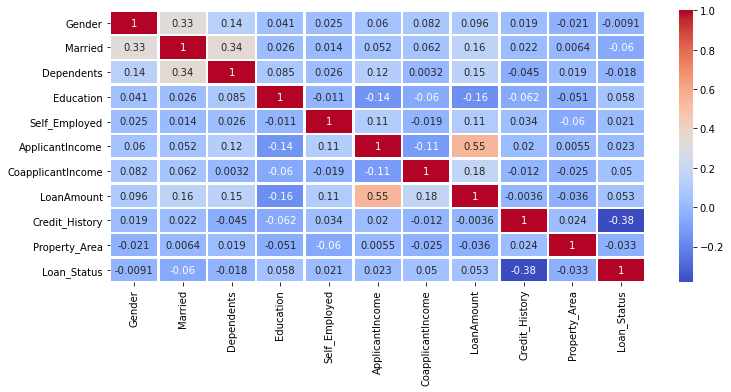

In [58]:
plt.figure(figsize=(12,5))
sns.heatmap(loan_df.corr(),annot=True,cmap='coolwarm',linewidth=1.5)

In [59]:
loan_df2=loan_df.drop('Loan_Status',axis=1)

In [60]:
loan_df2.corrwith(loan_df.Loan_Status)

Gender              -0.009116
Married             -0.059570
Dependents          -0.018397
Education            0.057680
Self_Employed        0.021323
ApplicantIncome      0.023077
CoapplicantIncome    0.050084
LoanAmount           0.053077
Credit_History      -0.380696
Property_Area       -0.032649
dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

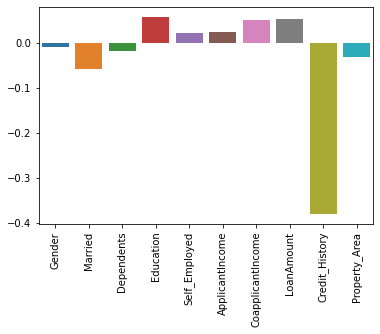

In [61]:
sns.barplot(loan_df2.corrwith(loan_df.Loan_Status).index,loan_df2.corrwith(loan_df.Loan_Status))
plt.xticks(rotation=90)

## Splitting the Dataset into Train and Test

In [62]:
X=loan_df.drop('Loan_Status',axis=1)
y=loan_df['Loan_Status']

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=51)

In [65]:
print("Shape of X_train is {}\n".format(X_train.shape))
print("Shape of y_train is {}\n".format(y_train.shape))
print("Shape of X_test is {}\n".format(X_test.shape))
print("Shape of y_test is {}\n".format(y_test.shape))

Shape of X_train is (686, 11)

Shape of y_train is (686,)

Shape of X_test is (295, 11)

Shape of y_test is (295,)



In [66]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,142.51153,360,1,2,0
1,1,1,1,0,0,4583,1508.0,128.00000,360,1,0,1
2,1,1,0,0,1,3000,0.0,66.00000,360,1,2,0
3,1,1,0,1,0,2583,2358.0,120.00000,360,1,2,0
4,1,0,0,0,0,6000,0.0,141.00000,360,1,2,0


## Model Building

In [67]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

### Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

lr_classifier=LogisticRegression(random_state=51)
lr_classifier.fit(X_train,y_train)

y_pred_lr=lr_classifier.predict(X_test)

accuracy_score(y_test,y_pred_lr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8203389830508474

## Support Vector Classifier

In [69]:
from sklearn.svm import SVC

In [76]:
svc_classifier=SVC()

svc_classifier.fit(X_train,y_train)

y_pred_svc=svc_classifier.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.8203389830508474

### K Nearest Neighbors Classifier

In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier=KNeighborsClassifier(n_neighbors=23)

knn_classifier.fit(X_train,y_train)

y_pred_knn=knn_classifier.predict(X_test)

accuracy_score(y_test,y_pred_knn)

0.8203389830508474

### Naive Bayes Classifier

In [71]:
from sklearn.naive_bayes import GaussianNB

nb_classifier=GaussianNB()

nb_classifier.fit(X_train,y_train)

y_pred_nb=nb_classifier.predict(X_test)

accuracy_score(y_test,y_pred_nb)

0.8372881355932204

### Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier=DecisionTreeClassifier(criterion='gini',random_state=81)

dt_classifier.fit(X_train,y_train)

y_pred_dt=dt_classifier.predict(X_test)

accuracy_score(y_test,y_pred_dt)

0.7152542372881356

 Decision Tree using criterion as entropy

In [73]:
dt_classifier2=DecisionTreeClassifier(criterion='entropy' , random_state=51)
dt_classifier2.fit(X_train,y_train)

y_pred_dt2=dt_classifier2.predict(X_test)

accuracy_score(y_test,y_pred_dt2)

0.752542372881356

### Radom Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier=RandomForestClassifier(n_estimators=85,criterion='gini',random_state=51)

rf_classifier.fit(X_train,y_train)

y_pred_rf=rf_classifier.predict(X_test)

accuracy_score(y_test,y_pred_rf)

0.8508474576271187

Random Forest using criterion as entropy

In [75]:
rf_classifier2=RandomForestClassifier(n_estimators=65,criterion='entropy',random_state=61)

rf_classifier2.fit(X_train,y_train)

y_pred_rf2=rf_classifier2.predict(X_test)

accuracy_score(y_test,y_pred_rf2)

0.8508474576271187

### Accuracy of different Classification algorithm

In [77]:
print("Accuracy in Logistic Regression: {}\n".format(accuracy_score(y_test,y_pred_lr)))
print("Accuracy in Support Vector Classifier: {}\n".format(accuracy_score(y_test,y_pred_svc)))
print("Accuracy in K Nearest Neighbors : {}\n".format(accuracy_score(y_test,y_pred_knn)))
print("Accuracy in Nayes Bayes Classifier: {}\n".format(accuracy_score(y_test,y_pred_nb)))
print("Accuracy in Decision Tree with gini : {}\n".format(accuracy_score(y_test,y_pred_dt)))
print("Accuracy in Decision Tree with entropy : {}\n".format(accuracy_score(y_test,y_pred_dt2)))
print("Accuracy in Random Forest with gini: {}\n".format(accuracy_score(y_test,y_pred_rf)))
print("Accuracy in Random Forest with entropy : {}\n".format(accuracy_score(y_test,y_pred_rf2)))

Accuracy in Logistic Regression: 0.8203389830508474

Accuracy in Support Vector Classifier: 0.8203389830508474

Accuracy in K Nearest Neighbors : 0.8203389830508474

Accuracy in Nayes Bayes Classifier: 0.8372881355932204

Accuracy in Decision Tree with gini : 0.7152542372881356

Accuracy in Decision Tree with entropy : 0.752542372881356

Accuracy in Random Forest with gini: 0.8508474576271187

Accuracy in Random Forest with entropy : 0.8508474576271187



### From above accuracies , we can say that Random Forest has highest Accuracy.

## Confusion Matrix

In [84]:
cm=confusion_matrix(y_test,y_pred_rf)

In [85]:
cm

array([[227,  15],
       [ 29,  24]], dtype=int64)

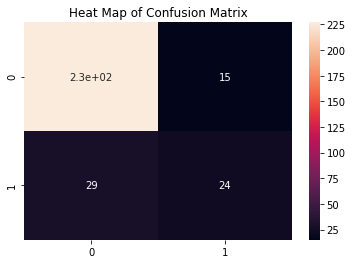

In [86]:
plt.title("Heat Map of Confusion Matrix")

sns.heatmap(cm,annot=True)
plt.show()

### Classification Report

In [87]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       242
           1       0.62      0.45      0.52        53

    accuracy                           0.85       295
   macro avg       0.75      0.70      0.72       295
weighted avg       0.84      0.85      0.84       295



### Cross Validation of the Model

In [88]:
from sklearn.model_selection import cross_val_score

cross_validation=cross_val_score(estimator=rf_classifier,X=X_train,y=y_train,cv=10)

In [92]:
print("Cross Validation accuracy of Random Forest: {}\n".format(cross_validation))

print("Cross Validation mean accuracy: {}".format(cross_validation.mean()))

Cross Validation accuracy of Random Forest: [0.76811594 0.82608696 0.79710145 0.86956522 0.82608696 0.79710145
 0.86764706 0.77941176 0.79411765 0.79411765]

Cross Validation mean accuracy: 0.8119352088661552


## Saving the dataset

In [97]:
loan_df.to_csv('loan_prediction_dataset.csv')

## Saving The Model Using Pickel

In [94]:
import pickle

In [95]:
pickle.dump(rf_classifier,open('loan_prediction.pickle','wb'))

In [96]:
loan_prediction_model=pickle.load(open('loan_prediction.pickle','rb'))

y_pred=loan_prediction_model.predict(X_test)
